# **DBScan using Pycaret**

Installing pycaret

In [1]:
!pip install pycaret[full]==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 266 kB 5.0 MB/s 
     |████████████████████████████████| 14.9 MB 42.2 MB/s 
     |████████████████████████████████| 3.4 MB 5.9 MB/s 
     |████████████████████████████████| 147 kB 32.2 MB/s 
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 
     |████████████████████████████████| 6.8 MB 55.0 MB/s 
     |████████████████████████████████| 2.0 MB 47.3 MB/s 
     |████████████████████████████████| 1.3 MB 57.7 MB/s 
     |████████████████████████████████| 1.7 MB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 56.8 MB/s 
     |████████████████████████████████| 325 kB 55.7 MB/s 
     |████████████████████████████████| 16

importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300
     

Generating random data

In [2]:
cols = ['c1', 'c2', 'c3',
        'c4', 'c5']
arr = make_blobs(n_samples = 2000, n_features = 5, random_state =20,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,c1,c2,c3,c4,c5
0,-5.257457,3.446568,5.620109,7.537123,4.205232
1,-3.883343,3.747579,7.648872,7.498281,6.770094
2,2.676129,8.812190,7.665326,4.875670,-10.901557
3,-3.034914,5.246510,5.367062,8.970289,4.801524
4,-5.890896,3.056923,5.224202,6.633781,5.738977


**Performing EDA**

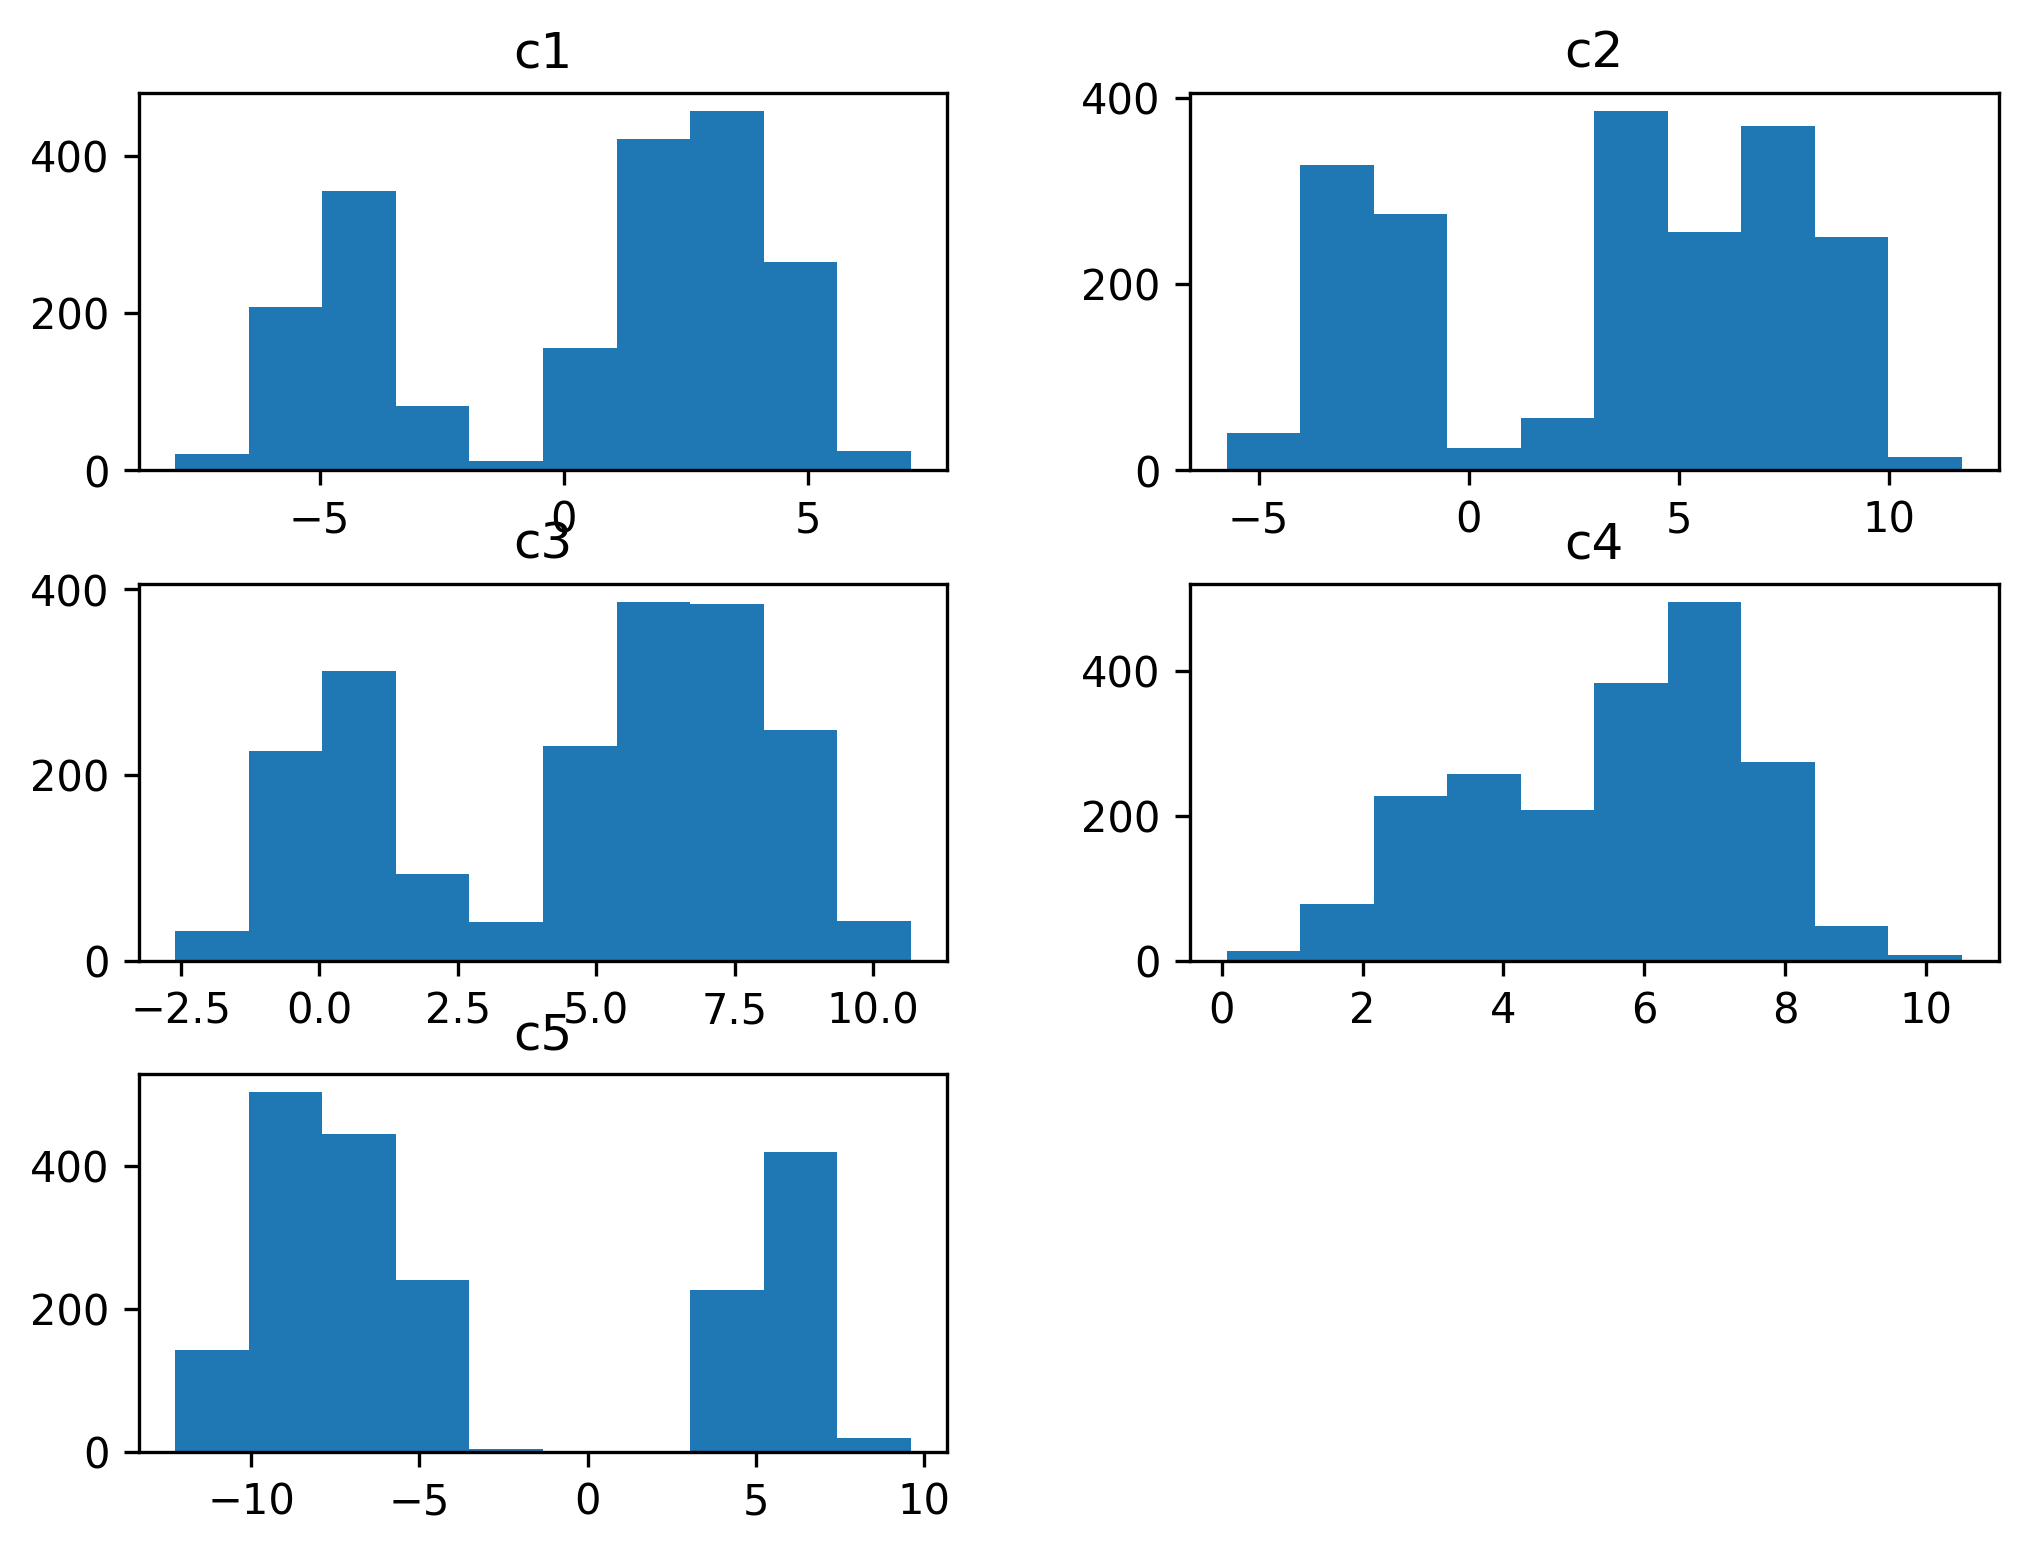

In [3]:
data.hist(bins = 10, figsize = (8,6), grid = False)
plt.show()

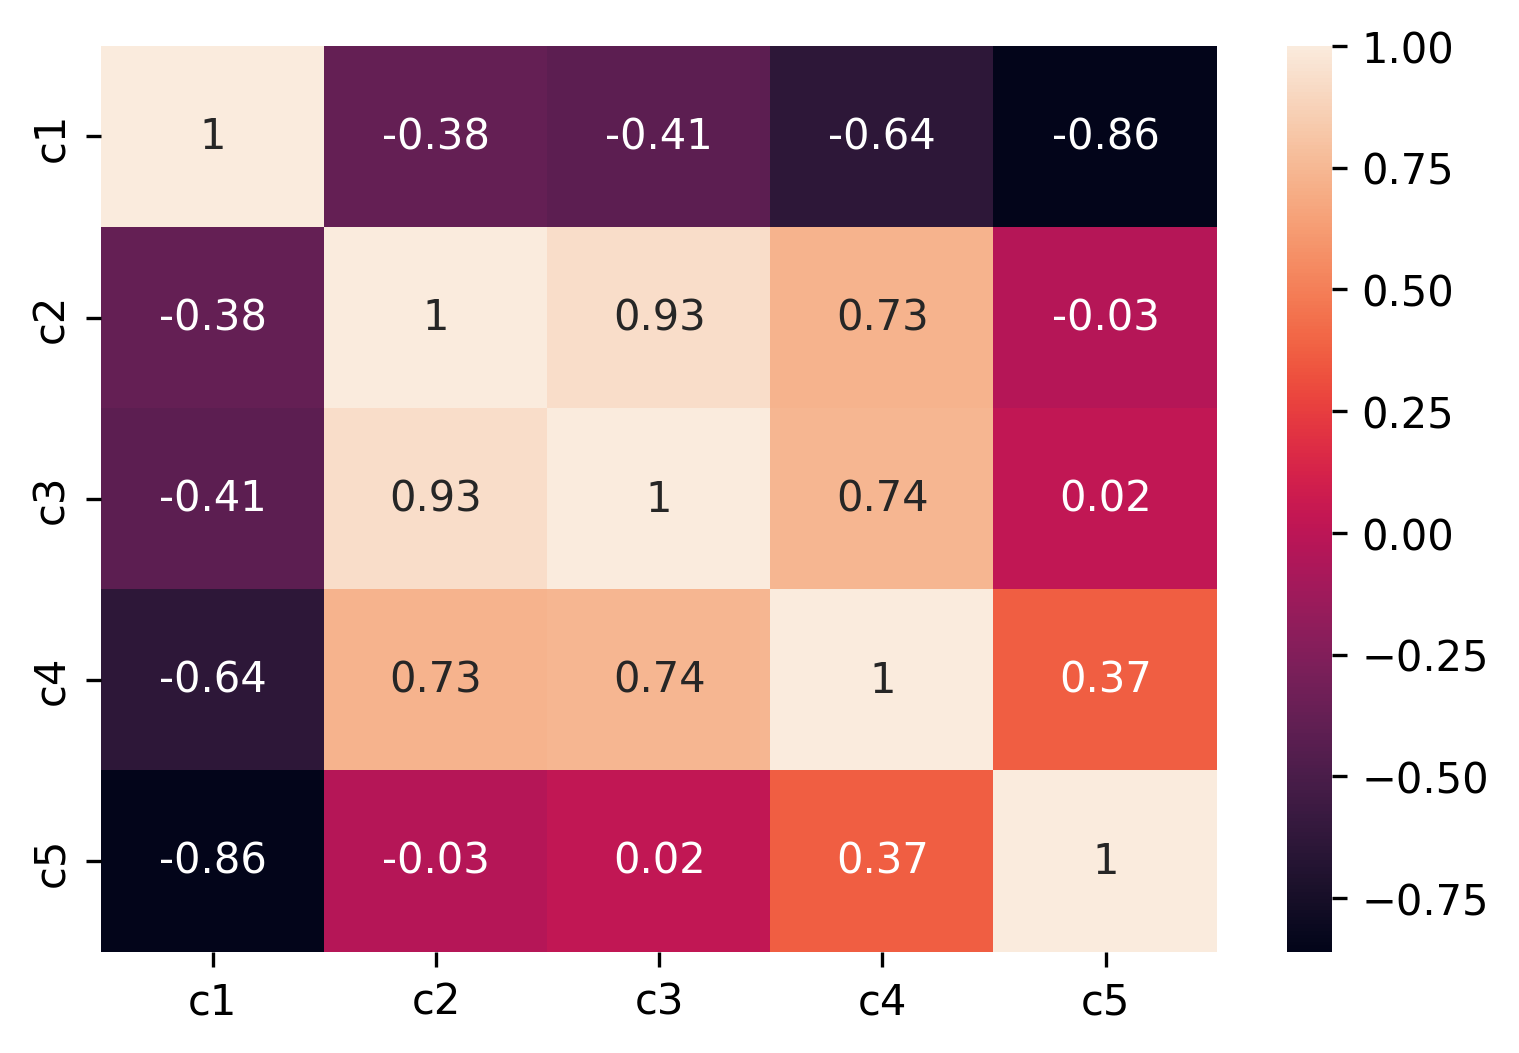

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

**Settin up Pycaret**

In [5]:
cluster = setup(data, session_id = 255)

,Description,Value
0,session_id,255
1,Original Data,"(2000, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2000, 5)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

Generating model

In [6]:
model = create_model('dbscan',num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1044,4.3693,1.1008,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)
INFO:logs:create_model() succesfully completed......................................


Plotting model

In [7]:
plot_model(model, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
